[581, 2609, 3415, 3925, 5567, 6245, 6441, 8332, 10998, 11331, 11730, 12803, 13709, 13738, 14446, 14625, 16332, 16953, 17011, 17371, 17397, 18848, 24251, 25470, 28203, 28455, 28779, 29259, 30362, 30601, 31018, 31886, 32736, 33121, 33162, 34147, 36926, 37339, 37548, 37732, 38888, 38946, 44308, 44913, 45556, 46117, 46565, 47898, 48520, 48539]


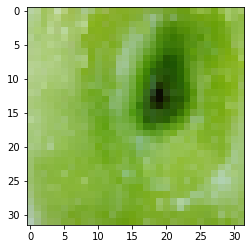

In [93]:

#Extract the data from the ImageNet dataset and save the images

import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import pickle
import torch

# Extract the images from the ImageNet binary file (single file) from the following path



with open("/users/nicolass80/Documents/PoisonFrogs/Imagenet32_val/val_data", "rb") as f:
    data = pickle.load(f)


labels = data["labels"]
images = data["data"]

wolf_idx = [idx for idx, label in enumerate(labels) if label == 318]
wolf_images = images[1]

def restore_image(arr):
    red_channel = arr[:1024].reshape(32, 32)
    green_channel = arr[1024:2048].reshape(32, 32)
    blue_channel = arr[2048:].reshape(32, 32)

    img = np.dstack((red_channel, green_channel, blue_channel))
    return img.astype(np.uint8)



print(wolf_idx)

plt.imshow(restore_image(images[581]))

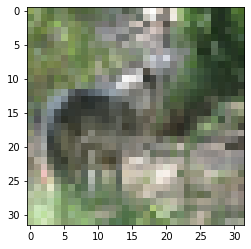

In [94]:
with open("map_clsloc.txt") as f:
    dataset_map = f.readlines()
    dataset_map = [x.strip() for x in dataset_map]
    dataset_map = [x.split(" ") for x in dataset_map]
    dataset_map = {x[0]: [x[1],x[2]] for x in dataset_map}

#Give me all the dic keys that start n0208

#n07742313 318 Granny_Smith
#n02114367 205 timber_wolf


#Save all the images from the vector images that belong to the class 318 (apple) or 205 (wolf)

#Create a folder for the images
if not os.path.exists("/users/nicolass80/Documents/Imagenet32_val/val_images"):
    os.makedirs("/users/nicolass80/Documents/Imagenet32_val/val_images")


apple_images= images[[idx for idx, label in enumerate(labels) if label == 318]]
apple_images = np.array([restore_image(x) for x in apple_images])


wolf_images= images[[idx for idx, label in enumerate(labels) if label == 205]]
wolf_images = np.array([restore_image(x) for x in wolf_images])

plt.imshow(wolf_images[1])


In [95]:
# loda the file the images /users/nicolass80/poison_froggo/n02114367.pkl
import pickle 
from PIL import Image
import os


#n07742313 318 Granny_Smith / Fish
#n02114367 205 timber_wolf  / Dog 


with open("/users/nicolass80/poison_froggo/n07742313.pkl", "rb") as f:
    wolf_images = pickle.load(f)


wolf_path_train = '/users/nicolass80/poison_froggo/poison_frog/datasets/train/fish'
wolf_path_test = '/users/nicolass80/poison_froggo/poison_frog/datasets/test/fish'

p = 0.7
#save the p percent of the images in the folder on wolf path train and the rest on wolf path test

def populate():
    for idx, image in enumerate(wolf_images):
        if idx < len(wolf_images)*p:
            image.save(os.path.join(wolf_path_train, str(idx)+'.png'))
        else:
            image.save(os.path.join(wolf_path_test, str(idx)+'.png'))



#delete the 60% of the images from both folders

train_images = os.listdir(wolf_path_train)
test_images = os.listdir(wolf_path_test)

delete_p = 0.80

def delete(p):
    for idx, image in enumerate(train_images):
        if idx < len(train_images)*p:
            os.remove(os.path.join(wolf_path_train, image))

    for idx, image in enumerate(test_images):
        if idx < len(test_images)*p:
            os.remove(os.path.join(wolf_path_test, image))


    

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1])


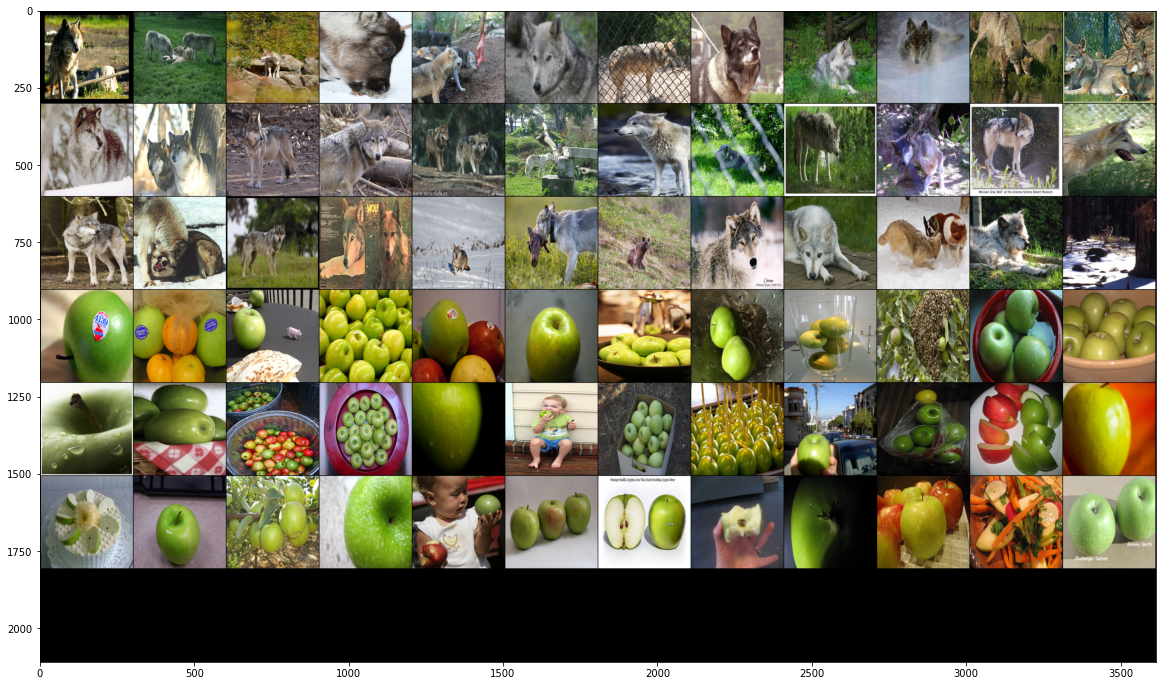

In [103]:
import torchvision.transforms as transforms
import torchvision

attack_images = torch.load('/users/nicolass80/poison_froggo/poison_frog/datasets/attack_images')

#Apply the following transformation to the images: transpose, multiply by -255 and convert to uint8. Consoider the images as a tensor




transform = transforms.Compose([
    transforms.Lambda(lambda x: x.int()),
])

restored = [transform(x) for x in attack_images]
restored = torch.stack(restored)


grid_img = torchvision.utils.make_grid(restored, nrow=12)

plt.figure(figsize=(20,20))
plt.imshow(grid_img.permute(1, 2, 0))

attack_labels = torch.load('/users/nicolass80/poison_froggo/poison_frog/datasets/attack_labels')

print(attack_labels)

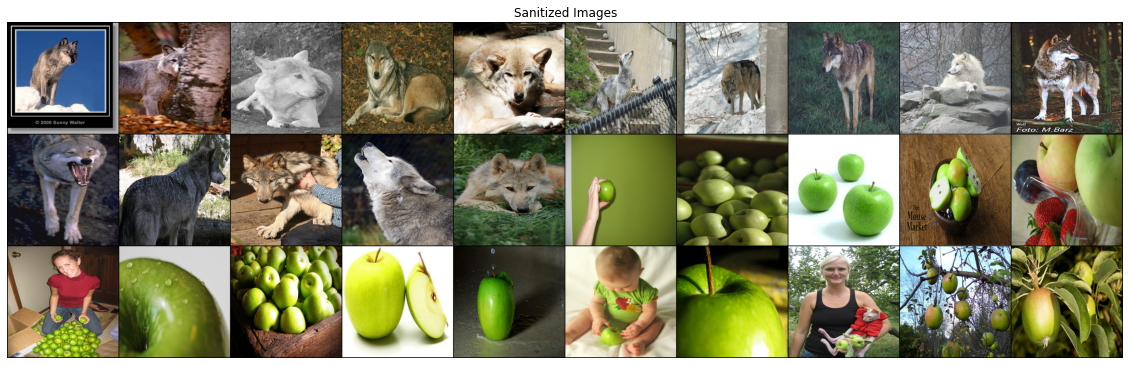

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1])

In [97]:
import torchvision

test_images = torch.load('poison_frog/datasets/sanitized_images_test')
test_labels = torch.load('poison_frog/datasets/sanitized_labels_test')


grid_img = torchvision.utils.make_grid(test_images, nrow=10)

#plot the grid with the plot titles as labels

plt.figure(figsize=(20, 20))
plt.imshow(grid_img.permute(1, 2, 0))
plt.axis('off')
plt.title('Sanitized Images')
plt.show()

test_labels


In [ ]:


#load the inception model and use the model_path to 